In [1]:
import boto3
import json
import csv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import re

In [2]:
client = boto3.client('s3')

In [3]:
sts = boto3.client('sts')
sts.get_caller_identity()

{'UserId': 'AIDA4X4DMGHLU4HZ6FIZY',
 'Account': '875911983575',
 'Arn': 'arn:aws:iam::875911983575:user/robert',
 'ResponseMetadata': {'RequestId': 'c8ec94f2-8ee5-433a-a882-6d6901ae98ff',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'c8ec94f2-8ee5-433a-a882-6d6901ae98ff',
   'content-type': 'text/xml',
   'content-length': '403',
   'date': 'Tue, 05 Sep 2023 01:23:01 GMT'},
  'RetryAttempts': 0}}

In [4]:

def detect_document_aws(document, json_output_file_name):
    """Retreive text from documents with Textract. 
    As a second argument specify the desired json output file name. 
    The function returns a list of the "LINE" type blocks from the 
    """
    
    with open(document, 'rb') as document:
        imageBytes = bytearray(document.read())
        
    textract = boto3.client('textract')
    
    response = textract.detect_document_text(Document={'Bytes': imageBytes})
    """Create a list, so only the 'LINE' block type results will be showed."""
    line_blocks = []

    for block in response['Blocks']:
        if block['BlockType'] == 'LINE':
            line_blocks.append(block['Text'])
    
    with open (json_output_file_name, 'w') as file:
        json.dump(line_blocks, file)
        
    with open(json_output_file_name, 'r') as file:
        json_list = json.load(file)
    
    return json_list

        
    

In [5]:

"""Function to retreive results from the list, which was created with the 'detect_document_aws' function"""
def retreive_results(input_list):
    license_num_pattern_1 = r"^[A-Za-z]\d{7}$"
    license_num_pattern_2 = r"^DL [A-Za-z]\d{7}$"
    
    for item in input_list:
        # Check if the item starts with "LN "
        if item.startswith("LN"):
            last_name = item[2:].strip()
        # Check if the item starts with "FN "
        if item.startswith("FN"):
            first_name = item[2:].strip()
        #The date of birth is a bit tricky, so I used regular expressions. 
        if item.startswith("DOB"):
            date_of_birth = re.sub(r'[a-zA-Z]', '', item[4:])
        # Retreiving the Driver`s Licence number
        licence_number_1 = re.findall(license_num_pattern_1, item)
        licence_number_2 = re.findall(license_num_pattern_2, item)
        if len(licence_number_1) > 0 :
            licence_number = licence_number_1[0]
        elif len(licence_number_2) > 0: 
            licence_number = ''.join(licence_number_2).strip("DL")
    
            
    print(f'Last name: {last_name}')
    print(f'First name: {first_name}')
    print(f'Date of birth: {date_of_birth}')
    print(f'Licence number: {licence_number}')


In [6]:
# Photo examples to use. 
photo_1 = 'cal_dl_1.jpg'
photo_2 = 'cal_dl_2.jpg'
photo_3 = 'cal_dl_3.jpg'

In [18]:
#In the following 3 cells the function to use Extract is called. 
#I used three different cells, so it won`t call extract three times if I have to rerun it
detect_document_aws(photo_1, 'cal_dl_1.json')

['CALIFORNIA',
 'DRIVER LICENSE',
 'DL A1234568',
 'CLASS c',
 'EXP 08/31/2015',
 'END NONE',
 'LN Ahgren',
 'FN Ludwig',
 '2570 24TH STREET',
 'SACRAMENTO. CA 95818',
 '2027',
 'DOBBB 07/06/1995',
 'RSTR NONE',
 '08311977',
 'DONOR',
 'SEX M',
 'HAIR Blonde EYES Fuck idk',
 "J don't do taxes",
 'HGT 5\'02"',
 'WGT 347lbs.',
 'ISS',
 'DD 09/30/201060221/21F0/15',
 '09/30/2012']

In [57]:
detect_document_aws(photo_2, 'cal_dl_2.json')

In [62]:
detect_document_aws(photo_3, 'cal_dl_3.json')

In [19]:
with open('cal_dl_1.json', 'r') as file:
        json_list_1 = json.load(file)

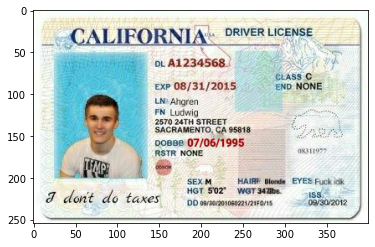

In [20]:
image = mpimg.imread(photo_1)
plt.imshow(image)
plt.show()

In [21]:
retreive_results(json_list_1)

Last name: Ahgren
First name: Ludwig
Date of birth:  07/06/1995
Licence number:  A1234568


In [22]:
with open('cal_dl_2.json', 'r') as file:
        json_list_2 = json.load(file)

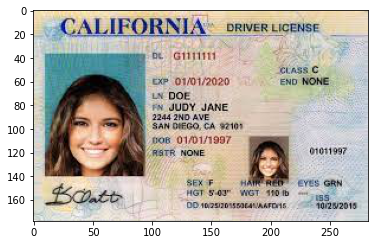

In [23]:
image = mpimg.imread(photo_2)
plt.imshow(image)
plt.show()

In [24]:
retreive_results(json_list_2)

Last name: DOE
First name: JUDY JANE
Date of birth: 01/01/1997
Licence number: G1111111


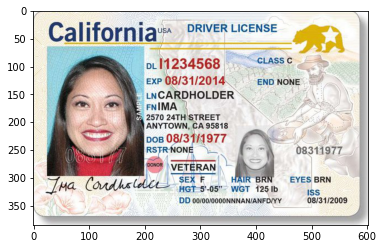

In [25]:
image = mpimg.imread(photo_3)
plt.imshow(image)
plt.show()

In [26]:
with open('cal_dl_3.json', 'r') as file:
        json_list_3 = json.load(file)

In [27]:
retreive_results(json_list_3)

Last name: CARDHOLDER
First name: IMA
Date of birth: 08/31/1977
Licence number: I1234568
